Colab Link: https://colab.research.google.com/drive/1jvXAqNAUx0vgOhMRTBLPJwJe26vsbRrQ




**Executive Summary**

In this analysis we will be using the mtcars data available in the R data base to explore the relationship between transmission and miles per gallon. While we have shown that automatic cars in our date set tend to have lower miles per Gallons, we have also proven that transmission was not a significant element to define Miles per Gallon and that observed correlation was due to a Simpson paradox which is proven in this paper. We conclude the best elements to be used to predict Miles per Gallons are the weights if the cars and the horsepower. We succeeded to reach .9092 of correlation between the initial weights and the fitted results.

**Set Environment**


In [0]:
#set R environment
cat(system('python3 -c "from google.colab import drive\ndrive.mount()"', intern=TRUE), sep='\n', wait=TRUE)

Warning message in system("python3 -c \"from google.colab import drive\ndrive.mount()\"", :
“running command 'python3 -c "from google.colab import drive
drive.mount()"' had status 1”



TRUE


In [0]:

install.packages("ggplot2", repos='http://cran.us.r-project.org', quiet=TRUE)
install.packages('dplyr')
install.packages('PerformanceAnalytics')
install.packages('car')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [0]:
library(ggplot2)
library(dplyr)
library(PerformanceAnalytics)
library(car)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



Attaching package: ‘xts’


The following objects are masked from ‘package:dplyr’:

    first, last



Attaching package: ‘PerformanceAnalytics’


The following object is masked from ‘package:graphics’:

    legend


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode




**Exploratory Analysis**

In [0]:
data(mtcars)
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [0]:
# encode all categorical variables as factor
mtcars$am     <- as.factor(mtcars$am)
mtcars$cyl    <- as.factor(mtcars$cyl)
mtcars$vs     <- as.factor(mtcars$vs)
mtcars$gear   <- as.factor(mtcars$gear)

A data frame with 32 observations on 11 variables.

* mpg = Miles/(US) gallon
* cyl = Number of cylinders
* disp = Displacement (cu.in.)
* hp = Gross horsepower
* drat = Rear axle ratio
* wt = Weight (1000 lbs)
* qsec = 1/4 mile time
* vs = V engine or straight engine
* am = Transmission (0 = automatic, 1 = manual)
* gear = Number of forward gears
* carb = Number of carburetors













The box plot and the table below show that manual engines tend to have higher Miles per Gallon. The average MPG for manual cars is 24.39 and 17.14 for automatic transmissions. However, we need to prove that transmission is a significant regressor to evaluate Miles per Gallon (Simpson’s paradox)


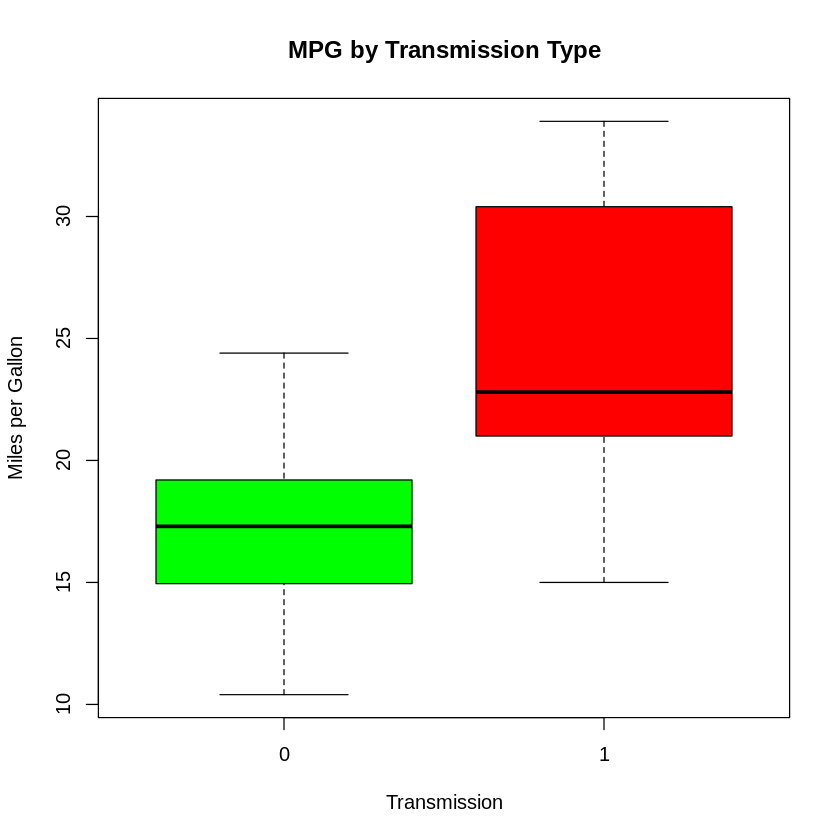

In [0]:
boxplot(mpg~am, data = mtcars,
        col = c("green", "red"),
        xlab = "Transmission",
        ylab = "Miles per Gallon",
        main = "MPG by Transmission Type")

In [0]:
aggregate(mpg~am, data = mtcars, mean)

am,mpg
<fct>,<dbl>
0,17.14737
1,24.39231


Imagine you find a correlation between chewing gum usage and cancer. However, you see that smokers tend to use more chewing gums to improve their breath. Would you tend conclude that cancer is due to chewing gum or smoking? This is a simple example Simpson paradox. Another well-known one is the UC Berkeley gender Bias I invite you to look at.

The below plot shows a chart between weight and Miles per Gallon. As you can see, heavier are the cars the less Miles per gallons the cars do. The dark dots represent cars with automatic transmissions and light dots represent manual transmissions. The automatic cats of our datasets tend to be heavier than manual cars.

Now, would you think that MPG is dictated by the transmission or the weight of the cars? This is a classic Simpson Paradox.


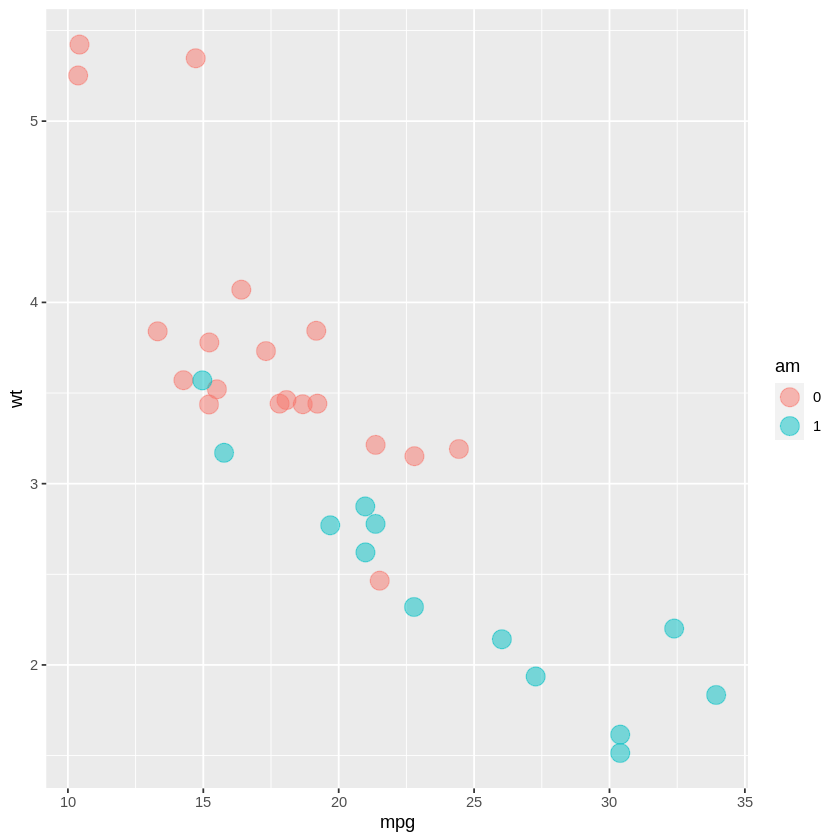

In [0]:
ggplot(aes(x = mpg, y = wt), data = mtcars) + 
geom_point(alpha = 0.5, size = 5, position = 'jitter',aes(color=am))

And just for the fun we can do the same with the number of cylinders and the displacement. We have similar results, while we can see that 8 cylinders and higher displacement tend to have lower miles per gallons, we see in fact that heavier cars in our dataset tend to have higher displacement and higher number of cylinders.

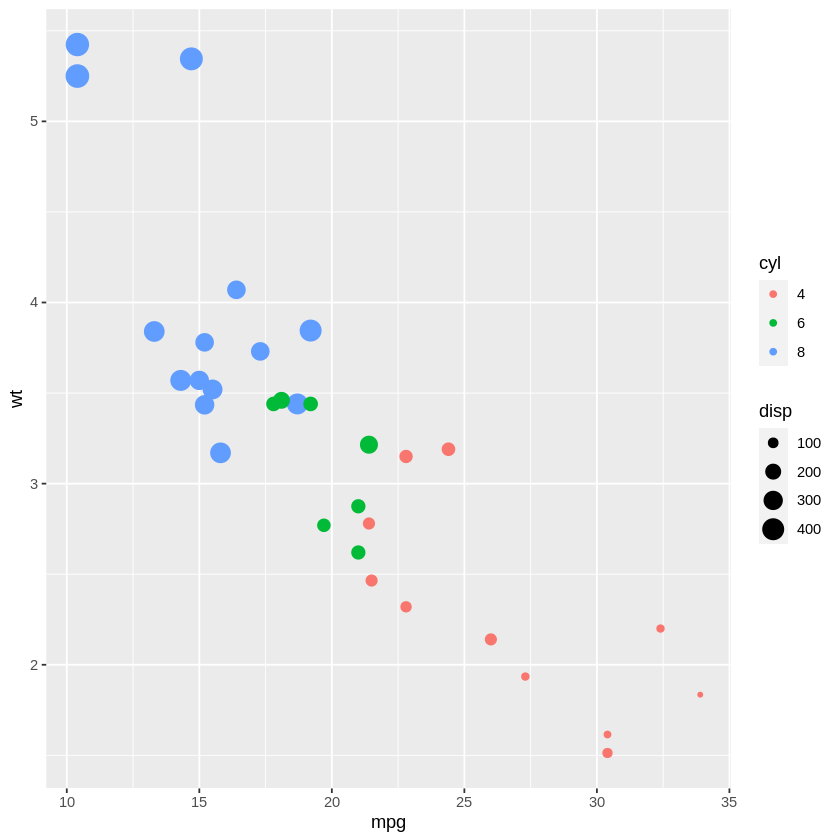

In [0]:
ggplot(aes(x = mpg, y = wt, col = cyl, size = disp), data = mtcars) + 
geom_point()

On the charts below are the representations of transmission types (Manual = 1, Automatic = 0), numbers of cylinders and displacement (CU. in.) against the weight. As you can see the higher number of cylinders, automatic transmission and higher displacement tend to be heavier cars. As a result, the impact on MPG could only be the weight.


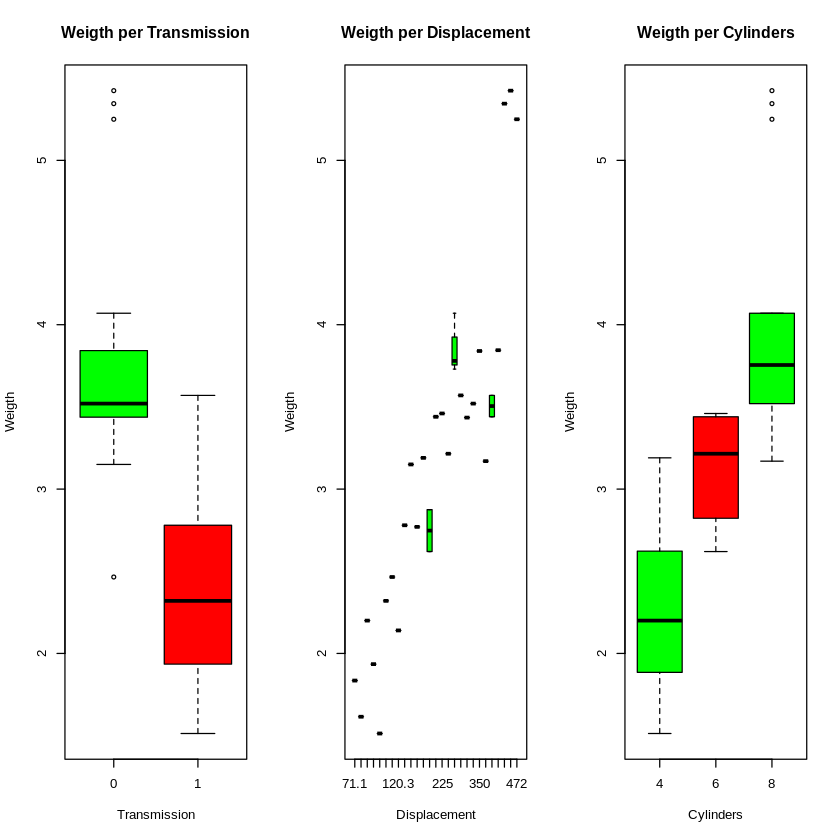

In [0]:

par(mfrow=c(1,3))
boxplot(wt~am, data = mtcars,
        col = c("green", "red"),
        xlab = "Transmission",
        ylab = "Weigth",
        main = "Weigth per Transmission")
boxplot(wt~disp, data = mtcars,
        col = c("green", "red"),
        xlab = "Displacement",
        ylab = "Weigth",
        main = "Weigth per Displacement")
boxplot(wt~cyl, data = mtcars,
        col = c("green", "red"),
        xlab = "Cylinders",
        ylab = "Weigth",
        main = "Weigth per Cylinders")

**Regression Analysis**

In the exploration of our data, we have seen that transmission type is correlated with Miles per Gallons results. However, we have also shown that the transmission might not be the factor impacting the Miles per Gallon but the weight of the cars. Do to do, we can fit a linear model and define which data provides the most significance.

Only two of our data provides significance in defining the miles per gallon. They have the lowest P Value and are defined by a “.” on the right on the P value.

In [0]:
all <- lm(mpg ~ ., data = mtcars)
summary(all)


Call:
lm(formula = mpg ~ ., data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2015 -1.2319  0.1033  1.1953  4.3085 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) 15.09262   17.13627   0.881   0.3895  
cyl6        -1.19940    2.38736  -0.502   0.6212  
cyl8         3.05492    4.82987   0.633   0.5346  
disp         0.01257    0.01774   0.708   0.4873  
hp          -0.05712    0.03175  -1.799   0.0879 .
drat         0.73577    1.98461   0.371   0.7149  
wt          -3.54512    1.90895  -1.857   0.0789 .
qsec         0.76801    0.75222   1.021   0.3201  
vs1          2.48849    2.54015   0.980   0.3396  
am1          3.34736    2.28948   1.462   0.1601  
gear4       -0.99922    2.94658  -0.339   0.7382  
gear5        1.06455    3.02730   0.352   0.7290  
carb         0.78703    1.03599   0.760   0.4568  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.616 on 19 degrees of freedom
Multiple 

Now that we have defines our model1 with horsepower (hp) and weight (wt) we can compare it with Model2 which includes the Transmission.

The summary of Model1 shows that an increase in MPG is defined by a decrease in horsepower (hp) and weight (wt) which proves the significance of those two elements to define the MPG. However, in model 2, we can see the estimate in positive while we have earlier proven that we had a correlation between the transmission and the MPG.

The second important element is that the P value of the transmission is 0.14 and so is not significant of determining MPG.


In [0]:
Model1 <- lm(mpg ~ hp + wt, data = mtcars)
summary(Model1)


Call:
lm(formula = mpg ~ hp + wt, data = mtcars)

Residuals:
   Min     1Q Median     3Q    Max 
-3.941 -1.600 -0.182  1.050  5.854 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 37.22727    1.59879  23.285  < 2e-16 ***
hp          -0.03177    0.00903  -3.519  0.00145 ** 
wt          -3.87783    0.63273  -6.129 1.12e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.593 on 29 degrees of freedom
Multiple R-squared:  0.8268,	Adjusted R-squared:  0.8148 
F-statistic: 69.21 on 2 and 29 DF,  p-value: 9.109e-12


In [0]:
Model2 <- lm(mpg ~ hp + wt + am, data = mtcars)
summary(Model2)


Call:
lm(formula = mpg ~ hp + wt + am, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4221 -1.7924 -0.3788  1.2249  5.5317 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 34.002875   2.642659  12.867 2.82e-13 ***
hp          -0.037479   0.009605  -3.902 0.000546 ***
wt          -2.878575   0.904971  -3.181 0.003574 ** 
am1          2.083710   1.376420   1.514 0.141268    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.538 on 28 degrees of freedom
Multiple R-squared:  0.8399,	Adjusted R-squared:  0.8227 
F-statistic: 48.96 on 3 and 28 DF,  p-value: 2.908e-11


Another way to perform an analysis of variance with Anova on the two models to define is am has brought significance to the whole model. As we can see below the P value is 0.1413 and the conclusion is that transmission has not brought significance to the model.


In [0]:
anova(Model1, Model2)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,29,195.0478,NA,NA,NA,NA
2,28,180.2911,1,14.75668,2.291778,0.1412682


We can also analyse the compute the Variance inflation factor of the two models to see if the result per element is not inflated due to adding the am as a new regressor. the VIF quantifies the severity of multicollinearity in an ordinary least squares regression analysis. In other words. For example, if MPG is defined by weight and AM is also defined by weight, using the two elements to define MPG would added multicollinearity to your model.

In below analysis, we can see that the multicollinearity increases for each element if we add the transmission.


In [0]:
vif(Model1)

hp       wt 
1.766625 1.766625

In [0]:
vif(Model2)

hp       wt       am 
2.088124 3.774838 2.271082

**diagnostic of our Model 1**

We should have a strong correlation between our fitted results and the initial results. Below shows a correlation of .9092.

In [0]:
cor(Model1$fitted, mtcars$mpg)

[1] 0.9092774

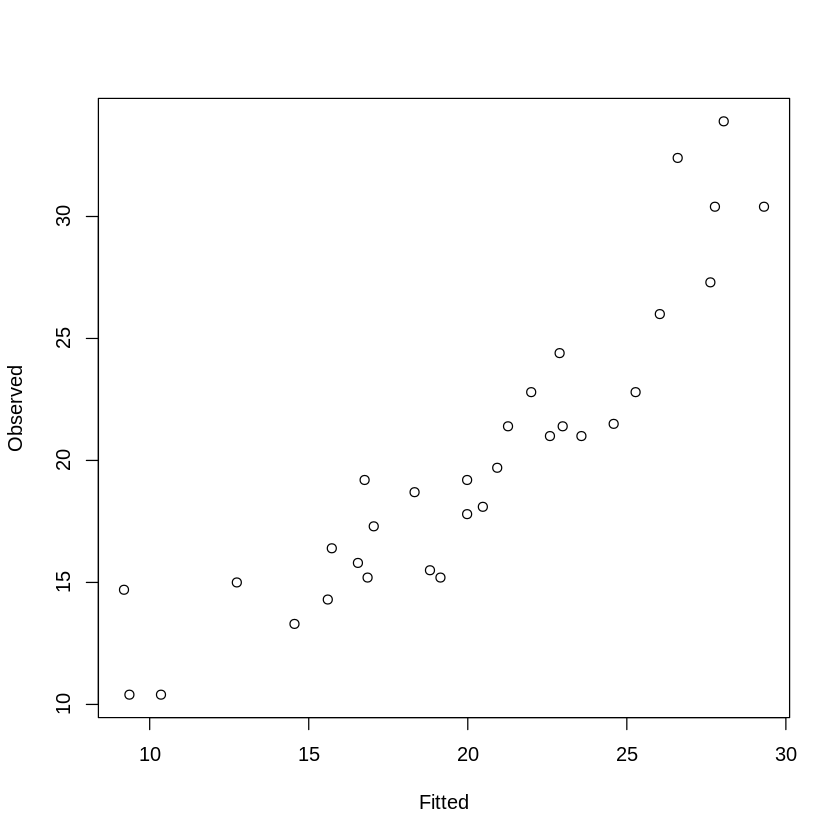

In [0]:
par(mfrow=c(1,1))
plot(Model1$fitted, mtcars$mpg, ylab="Observed", xlab="Fitted")

The residuals do not display any obvious heteroscedasticity. However, as we can see in the Residuals vs Fitted, we can observe a smile effect which is due to two cars the model as failed to predict as well as the others. we can also see on our normal QQ plot the same two cars are out of their standardised residuals. This might mean that we could improve our model by removing the two times of the list.

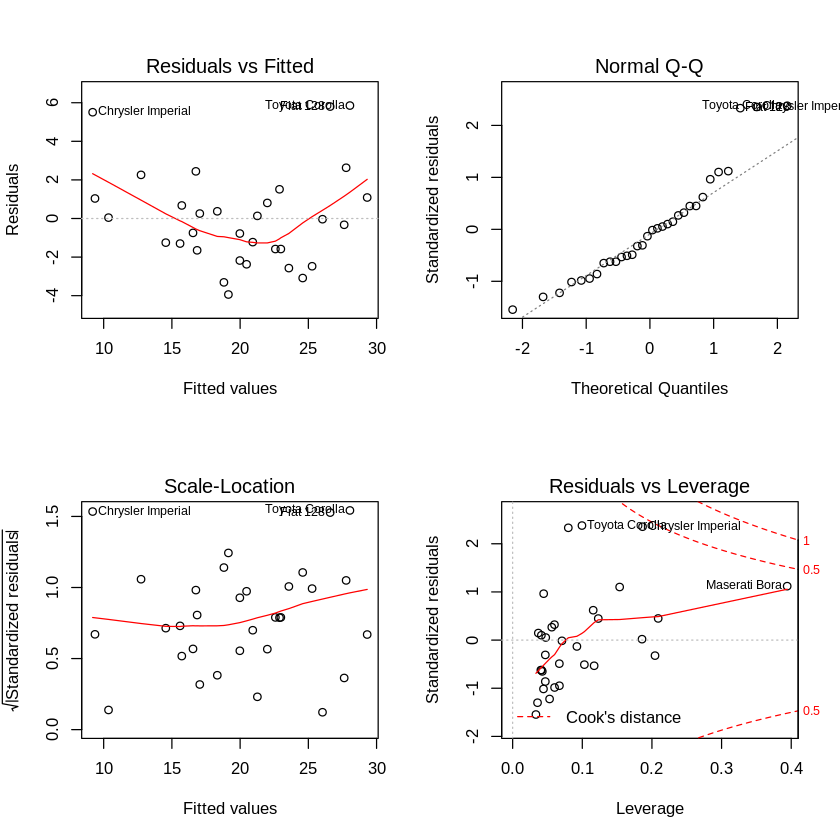

In [0]:
par(mfrow=c(2,2))
plot(lm(mpg ~ hp + wt, data=mtcars))

**Conclusion**

We succeeded to build a model that was strong enough to be able to predict the MPG given the weight and the horse power.

Unfortunately, while we earlier saw a correlation between the transmission type and the Miles per Gallons, we have proved that we were facing a Simpson Paradox and that the transmission was not a factor strong enough to define the MPG. As a result, to the initial question " Is manual transmission better and automatic regarding MPG" the answer is no, we cannot prove that.

We have also proven that two cars types are out of their standardised residuals which means that by removing those two items we could create a stronger model.